# Модуль `red`

*Замечание:* в строгом смысле `red` модулем языка `python` не является, так как состоит всего из нескольких файлов и оформлять его в виде стандартного модуля по всем правилам излишне.

## Структура модуля

Модуль `red` состоит из нескольких файлов.

- `red.py` — основной файл, в котором находятся все классы, реализующие дисциплины обслуживания очереди типа RED;
- `rungekutta.py` — несколько методов, реализующих численные схемы Рунге-Кутты 2,3,4,5 и 6 порядков (используются в `red.py`);
- `sde.py` — набор функций, реализующих стохастические численные схемы типа Рунге-Кутты;
- `plot.py` — набор функций для рисования стандартных графиков;
- `main.py` — сценарий стандартных вычислений (вычислить и нарисовать графики стохастического и детерминированного фазового портрета, решений уравнений и параметров автоколебаний)

Также необходимы библиотеки `numpy`, `matplotlib` и `scipy`

## Справка по red.py

При разработке программы использовался объектно-ориентированный подход. В качестве объектов были выбраны дисциплины обслуживания очередей. Так как все они основаны на дисциплине обслуживания RED, то естественным способом их программной реализации было выделение объекта RED в суперкласс и наследование его всеми остальными объектами (ARED, AURED, DSRED, EFRED, POWARED, RARED, SARED, WRED). При этом подклассы наследуют все методы и атрибуты суперкласса и переопределяют лишь те методы, которые отличают конкретную дисциплину обслуживания от RED.

Так как ни в одном подклассе не вводится новых методов, то достаточно  дать **описание суперкласса RED.**

`__init__(self, q_min=0.2, q_max=0.4)` — конструктор класса RED инициирующий следующие атрибуты:
- `name` — имя дисциплины обслуживания,
- `Tp` — время прохождения пакета от источника до узла и обратно,
- `wq` — вес очереди,
- `w_max` — максимальный размер TCP-окна,
- `q_min` — минимальное пороговое значение пакетов для алгоритма RED %,
- `q_max` — максимальное пороговое значение пакетов для алгоритма RED %,
- `c_small` — количество обслуживаемых за 1 секунду пакетов,
- `R` — размер буфера,
- `p_max` — максимальная вероятность сброса,
- `N` — количество узлов,
- `delta` — вычисляется на основе `c_small`,
- `time_interval` — временной интервал интегрирования, кортеж  $(t_0, T)$,
- `with_pto` — включить/выключить сброс по тайм-ауту.

**Методы класса:**

- `C(x)` — вычисление интенсивности обслуженной нагрузки.
- `P(x)` — функция вероятности сброса RED применяемая при решении дифференциальных уравнений.
- `P2(x)` — функция вероятности сброса RED применяемая при решении уравнений автоколебания.
- `Q(x)` — правая часть уравнения для вычисления мгновенного размера очереди.
- `Qe(x)` — правая часть третьего уравнения системы, вычисляющее экспоненциально взвешенное скользящее среднее значение мгновенной длины очереди.
- `Ttot(x)` — время потери по тайм-ауту $T_{TO}$.
- `W(x)` — правая часть первого уравнения системы ОДУ. Функции для вычисления размера TCP-окна.
- `W_sde(x)` — правая часть первого уравнения системы СДУ. Функции для вычисления размера TCP-окна. Отличие от `W` в отсутствии знака минус у выражения `x[0]/2.0`.
- `ode(t, x, p)` — правая часть ОДУ. Три аргумента добавлены для совместимость.
Принимает следующие аргументы:
    - `t` — время,
    - `x` — переменная массив из трех элементов `[W(t), Q(t), Qe(t)]`,
    - `p` — параметры.

- `p_to(x)` — вероятность сброса пр тайм-ауту.
- `sde_G(x)` — матрица диффузии (в данном случае она диагональна).
- `sde_f(x)` — вектор сноса.
- `self_oscillation_equation(x)` — система из двух уравнений для вычисления параметров автоколебания.
- `solve_ode(step=0.01, x_0=[1.0, 0.0, 0.0])` — метод решает ОДУ, ассоциированное с дисциплиной обслуживания. Для решения используется метод Рунге-Кутты из файла `rungekutta.py`, аргументы:
    - `step` — шаг,
    - `x_0` — начальные значения в виде списка из трех элементов.
- `solve_sde(step=0.01, x_0=[1.0, 0.0, 0.0])` — метод решает СДУ, ассоциированное с дисциплиной обслуживания. Для решения используется метод из файла `sde.py`; аргументы те же что и у предыдущего метода.
- `solve_self_oscillation_equation_2d(equation_type='ode')` — решает систему алгебраических уравнений для параметров автоколебания в случае изменения только `q_max`.
- `solve_self_oscillation_equation_3d()` — решает систему алгебраических уравнений для параметров автоколебания в случае изменения и `q_max` и `q_min`.

## Примеры использования для расчетов

Предполагается, что читающий знает основы языка `python` и умеет пользоваться оболочкой `ipython notebook` или создавать файлы сценариев на `python`.

In [1]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-

Вначале импортируем необходимые библиотеки. Это вопервых внешние библиотеки (в данном случае `matplotlib`) и локальные (`red` и `plot`)

In [2]:
import matplotlib.pyplot as plt

from IPython.display import Image

import red
import plot

После этого настроим интерактивное использование `matplotlib` и зададим параметры отображения картинок: размер, разрешение, шрифт и размер шрифта.

In [3]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (10.0, 6.0)
rcParams['figure.dpi'] = 200
rcParams['font.family'] = "Liberation Serif, DejaVu Serif"
rcParams['font.size'] = 18

После этого приступаем к расчетом. Вначале надо создать объект (дисциплину обслуживания). Мы для примера создадим `RED`. Доступны также `ARED, AURED, DSRED, EFRED, POWARED, RARED, SARED, WRED`. Вновь созданный объект мы назовем именем `xred` (название может быть любым).

In [4]:
xred = red.RED()

Теперь рассмотрим работу двух методов: `solve_ode(step=0.01, x_0=[1.0, 0.0, 0.0])` и `solve_sde(step=0.01, x_0=[1.0, 0.0, 0.0])`. Задаем шаг и промежуток интегрирования, а также начальное значение. Обратите внимание, что промежуток интегрирования это атрибут объекта `xred`.

In [5]:
xred.time_interval = (0.0, 50.0)

h = 0.01
x_0=[1.0, 0.0, 0.0]

In [6]:
t, W, Q, Qe = xred.solve_ode(h, x_0)
ts, Ws, Qs, Qes = xred.solve_sde(h, x_0)

Вычисления займут несколько секунд. После этого мы получим решения ОДУ и СДУ в виде списков `t, W, Q, Qe, ts, Ws, Qs, Qes`. Их можно использовать, например, для построения графиков.

In [7]:
fig0 = plt.figure(0)
ax0 = fig0.add_subplot(1,1,1)

ax0.set_title("Решение $W(t)$")
ax0.plot(t,W)

fig0.tight_layout()

## Справка по plot.py

В файле `plot.py` уже определено несколько функций для вычисления и рисования стандартных графиков. Приведем примеры. Аргументы у функций следующие:
- `equation_type` — тип уравнения (`'ode'` или `'sde'`),
- `step` — шаг,
- `x_0` — начальная значение.

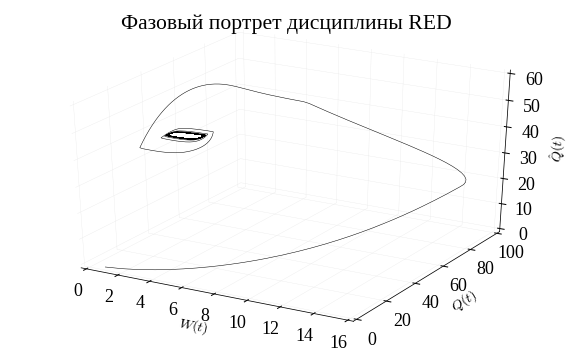

In [8]:
fig1, fig2 = plot.plot_solution(xred, equation_type='ode')

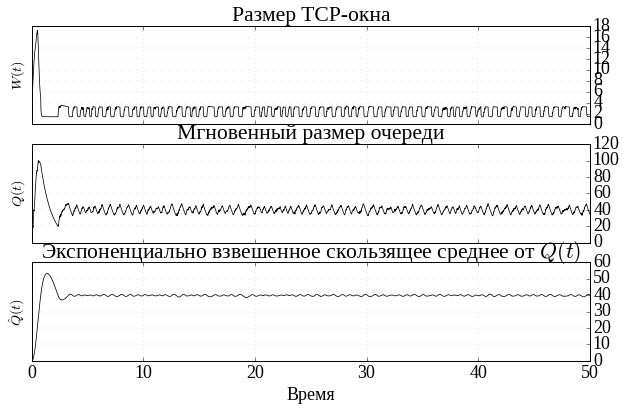

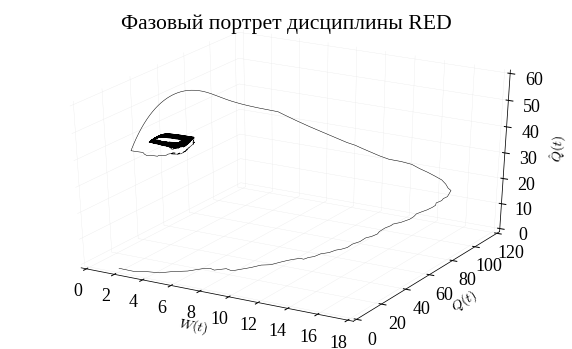

In [9]:
fig3, fig4 = plot.plot_solution(xred, equation_type='sde')

Графики для параметров автоколебаний также рисуются функцией из `plot.py`

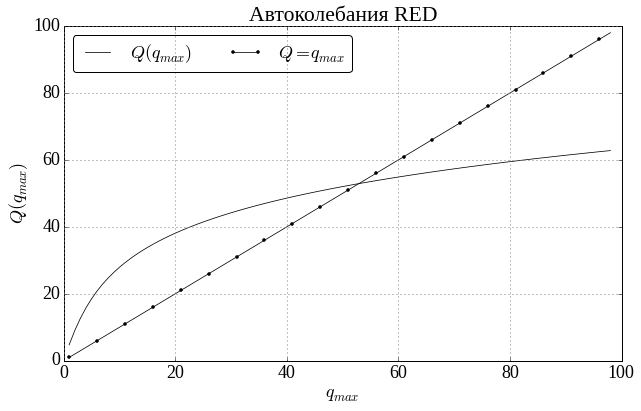

In [10]:
fig5 = plot.plot_self_oscillation_solution_2d(xred, equation_type='ode');

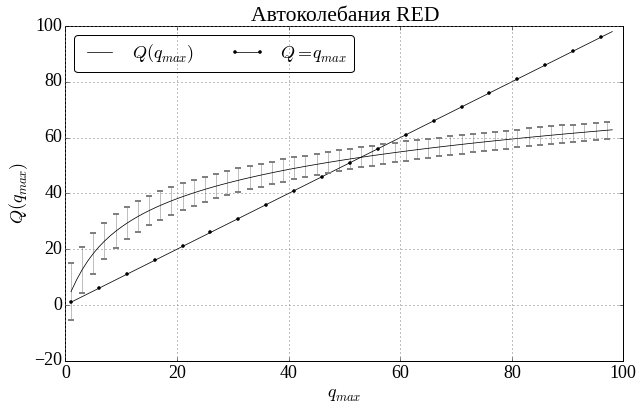

In [11]:
fig5 = plot.plot_self_oscillation_solution_2d(xred, equation_type='sde');

Следующие две функции используют внешнюю программу `gnuplot` для рисования графиков и возвращают название файла с изображением, сохраненным в текущей директории. Для настройки рисования служит файл `plot.gp`.

gnuplot -e model_name='RED' plot.gp


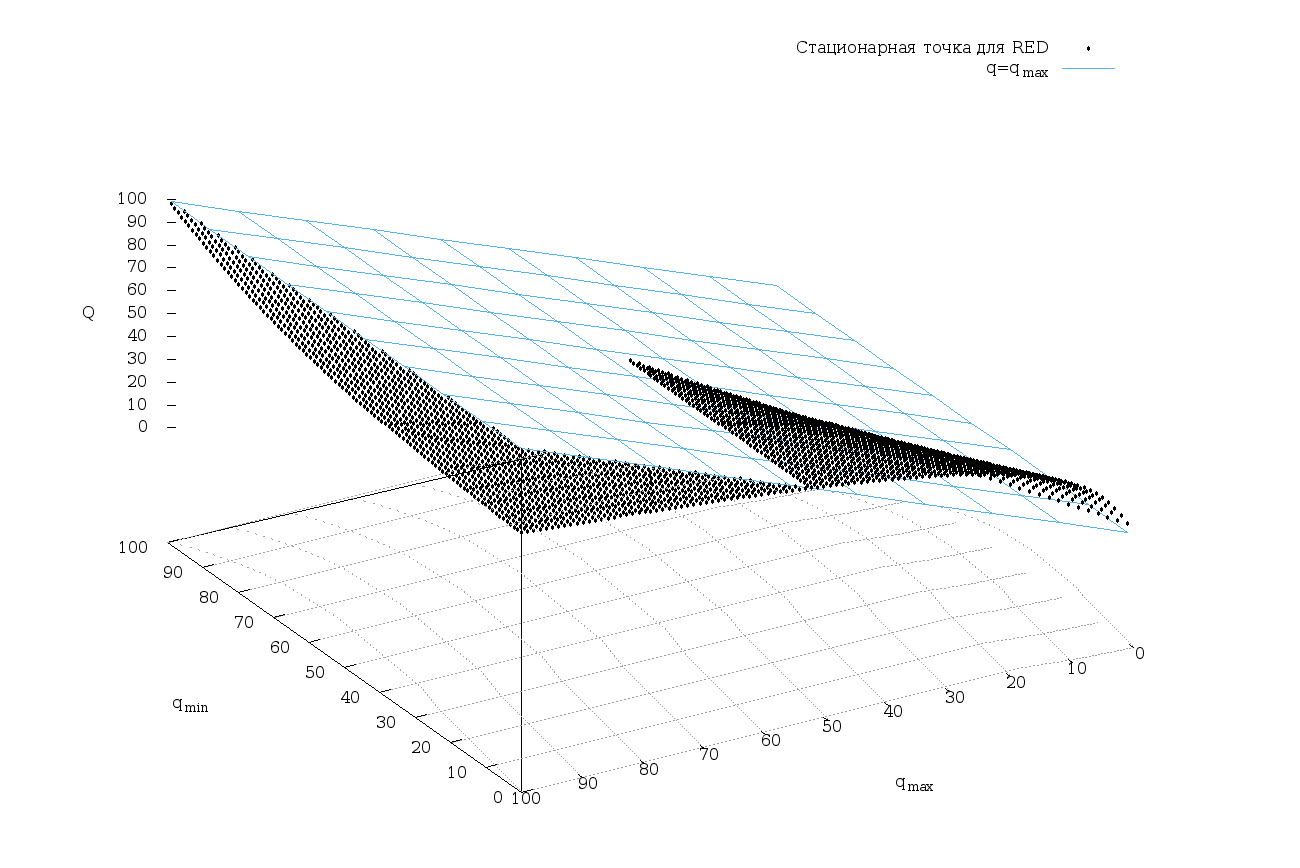

In [12]:
file = plot.plot_self_oscillation_solution_3d(xred, equation_type='ode');
Image(file)

gnuplot -e model_name='RED'; sde='1' plot.gp


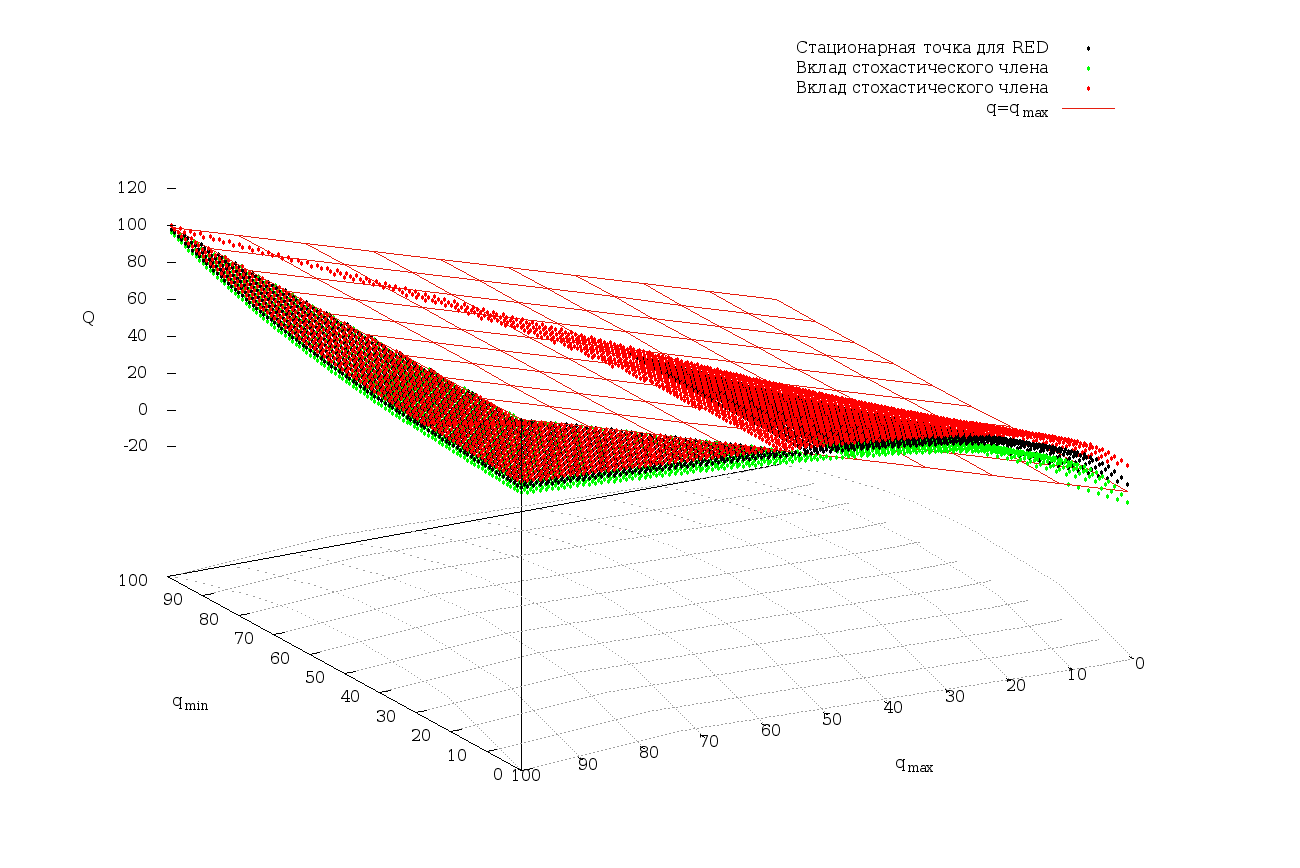

In [13]:
file = plot.plot_self_oscillation_solution_3d(xred, equation_type='sde');
Image(file)